## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

### Matplotlib Example

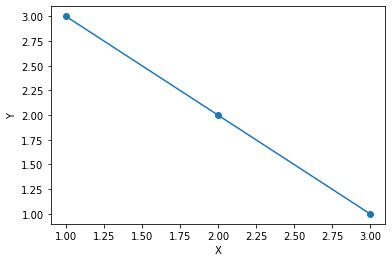

In [9]:
plt.plot([1,2,3], [3,2,1]) # settiong line
plt.scatter([1,2,3], [3,2,1]) # setting dots
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

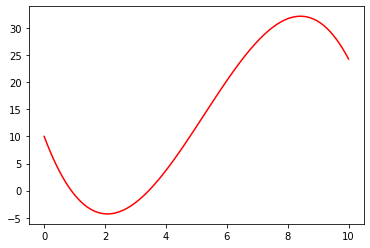

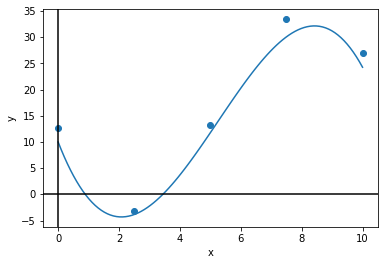

In [5]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)
y_line = foo(x_line)
# Quiz: Draw the function foo using x_line
# Ans1. 
plt.plot(x_line,y_line,'r')
plt.show()
# Ans2.
#draw_plot([x_line],[y_line] ,x_line,y_line) # 괄호를 쳐 줘야지 for 문의 range(len(X)) 부분이 정상적으로 동작한다.

# Quiz: Using linepace, Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
x_sample = np.linspace(0,10,5)
y_sample = foo(x_sample)
#draw_plot([x_line],[y_line],x_sample,y_sample)

# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=1.5 and visualize.
num_points = 5
x_sample = np.linspace(0,10,num_points)
np.random.seed(seed = 0) # Seed를 고정하고 test하면 debuging 하기 좋을 수도 있지 않을까...?
y_sample = foo(x_sample) + np.random.normal(0,1.5,num_points)
draw_plot([x_line],[y_line],x_sample,y_sample)

### Linear Regression

R^2:0.527995
MSE : 76.873701


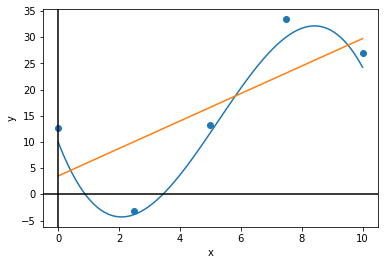

In [6]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()

# Training the linear regression model.
lr.fit(x_sample[:, None], y_sample) # fit(MATRIX, VECTOR) 을 parameter로 하기 때문에 vector인 x_sample을 matrix로 확장한다.

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)

# Predicting a single data point.
#print(x_sample[0])
#print(x_sample[[0],None])
y_hat = lr.predict(x_sample[[0],None]) # scalar값인 x_sample[0]을 Matrix로 형변환
#print(y_hat)

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
y_hat = lr.predict(x_sample[:,None])
print("MSE : %f" % ((y_sample - y_hat)**2).mean())

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
y_lr = lr.predict(x_line[:,None])
draw_plot([x_line,x_line],[y_line,y_lr],x_sample,y_sample)

[1, 3, 2] [1, 2, 3]


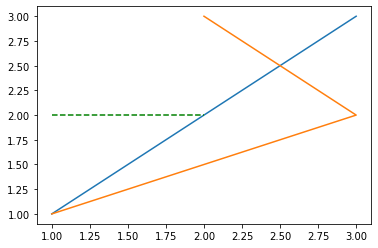

In [31]:
# plt.plot Example
def draw_plot22(X, Y):
    for i in range(len(X)): 
        print(X[i],Y[i])
        plt.plot(X[i], Y[i])
    plt.show()

plt.plot([1,2,3],[1,2,3])
plt.plot([1,2],[2,2],'g--')
draw_plot22([[1,3,2]],[[1,2,3]])

### Polynomial Regression

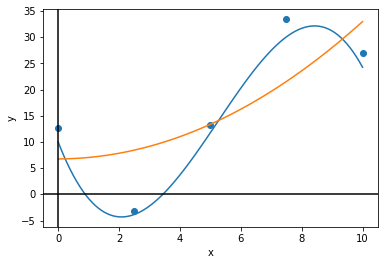

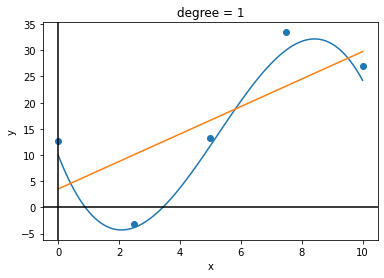

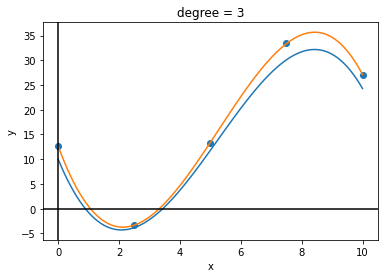

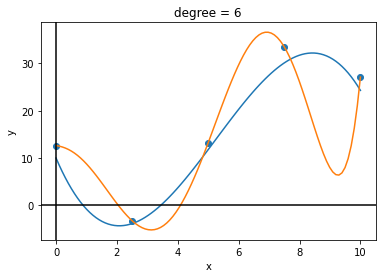

In [45]:
from sklearn.preprocessing import PolynomialFeatures
# sklearn에는 polynomial regression 이 없기 때문에 polynomial로 X를 transform 한 뒤 linear regression 을 수행한다.

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=2)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None]) # [x_1] -> [1, x_1, x_1^2]
#print(x_sample)
#print(x_sample[:,None])
#print(x_sample_poly)


# Train a linear regression model using the polynomial features.
pr = LinearRegression().fit(x_sample_poly, y_sample)

# Quiz: Visualize the polynomial regression model, in comparison with foo.
x_line_poly = poly.fit_transform(x_line[:, None])
y_poly = pr.predict(x_line_poly)
draw_plot([x_line,x_line],[y_line,y_poly],x_sample,y_sample)


# Quiz: What happens if you increase/decrease the degree of the polynomial?
# decrese : degree = 1 // Underfitting
poly = PolynomialFeatures(degree=1)
x_sample_poly = poly.fit_transform(x_sample[:, None])
pr = LinearRegression().fit(x_sample_poly, y_sample)
x_line_poly = poly.fit_transform(x_line[:, None])
y_poly = pr.predict(x_line_poly)
plt.title("degree = 1")
draw_plot([x_line,x_line],[y_line,y_poly],x_sample,y_sample)
# increse : degree = 3 // Good
poly = PolynomialFeatures(degree=3)
x_sample_poly = poly.fit_transform(x_sample[:, None])
pr = LinearRegression().fit(x_sample_poly, y_sample)
x_line_poly = poly.fit_transform(x_line[:, None])
y_poly = pr.predict(x_line_poly)
plt.title("degree = 3")
draw_plot([x_line,x_line],[y_line,y_poly],x_sample,y_sample)
# increse : degree = 6 // Overfitting
poly = PolynomialFeatures(degree=6)
x_sample_poly = poly.fit_transform(x_sample[:, None])
pr = LinearRegression().fit(x_sample_poly, y_sample)
x_line_poly = poly.fit_transform(x_line[:, None])
y_poly = pr.predict(x_line_poly)
plt.title("degree = 6")
draw_plot([x_line,x_line],[y_line,y_poly],x_sample,y_sample)

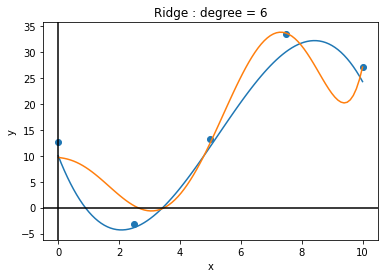

In [49]:
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=6)
x_sample_poly = poly.fit_transform(x_sample[:, None])
pr = Ridge(alpha = 10.0).fit(x_sample_poly, y_sample) # Ridge Regression (L2 Regularization)
x_line_poly = poly.fit_transform(x_line[:, None])
y_poly = pr.predict(x_line_poly)
plt.title("Ridge : degree = 6")
draw_plot([x_line,x_line],[y_line,y_poly],x_sample,y_sample)

### Iris Dataset

In [52]:
"""
data_path = './iris.data'
X = []
y = []
with open(data_path, 'r') as fid:
    count = 0
    for line in fid:
        print(line.strip())
X = np.array(X)
y = np.array(y)
"""

# Quiz: Fill the above for loop to load the data into X and y.


"\ndata_path = './iris.data'\nX = []\ny = []\nwith open(data_path, 'r') as fid:\n    count = 0\n    for line in fid:\n        print(line.strip())\nX = np.array(X)\ny = np.array(y)\n"

In [53]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)

### Train Test Split

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [55]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', degree = 4, random_state = 1234)
svm.fit(X_train[:, :2],y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

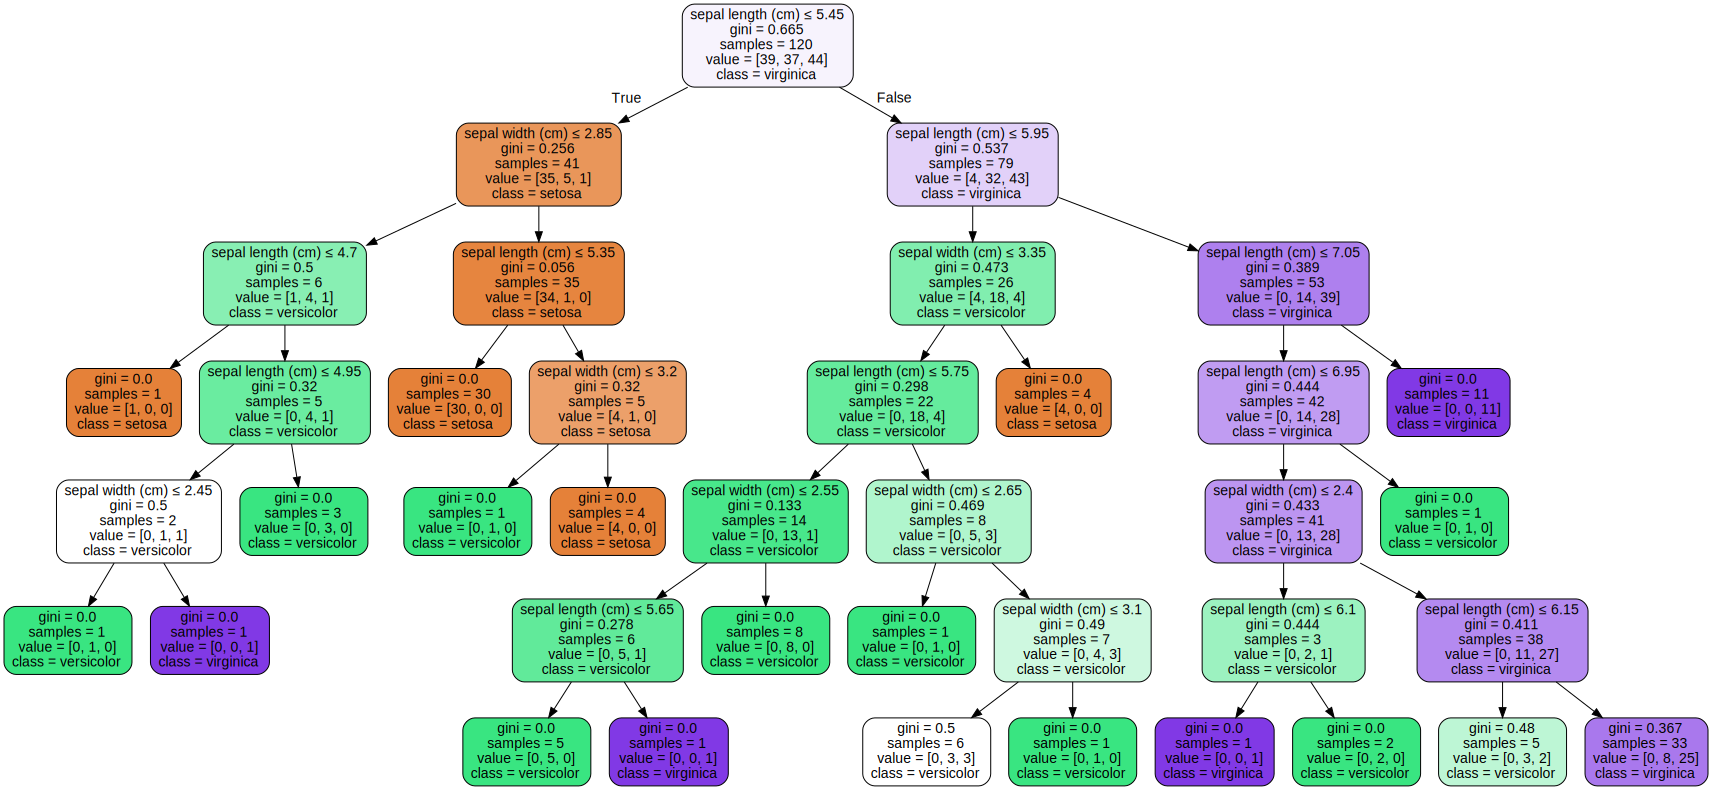

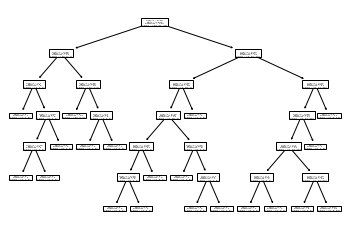

In [94]:
# Quiz: Import Decision Tree, then train DT
iris = load_iris()
#X = iris.data 
#y = iris.target 

from sklearn.tree import DecisionTreeClassifier as DTC

clf = DTC(max_depth = 6, random_state=1234)
clf = clf.fit(X_train[:, :2n], y_train)

# + Visualizastion DT
tree.plot_tree(clf)

import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") # Make DT grpah as PDF

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names[:2], 
                                class_names=iris.target_names, 
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [95]:
# Quiz: Use the model's predict() to calculate the test accuracy.
y_hat = logistic.predict(X_test[:,:2])
print("MSE : %f (logistic)" % ((y_test - y_hat)**2).mean())
print((y_test == y_hat).astype('float').mean())
y_hat = svm.predict(X_test[:,:2])
print("MSE : %f (SVM)" % ((y_test - y_hat)**2).mean())
print((y_test == y_hat).astype('float').mean())
y_hat = clf.predict(X_test[:,:2])
print("MSE : %f (DT)" % ((y_test - y_hat)**2).mean())
print((y_test == y_hat).astype('float').mean())

MSE : 0.266667 (logistic)
0.7333333333333333
MSE : 0.266667 (SVM)
0.7333333333333333
MSE : 0.300000 (DT)
0.7


In [96]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.
print(logistic.score(X_test[:,:2],y_test))
print(svm.score(X_test[:,:2],y_test))
print(clf.score(X_test[:,:2],y_test))

0.7333333333333333
0.7333333333333333
0.7


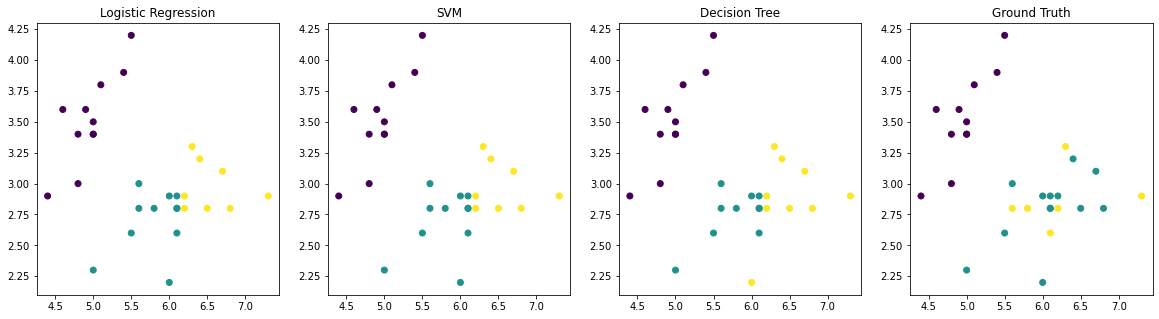

In [100]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
y_lr = logistic.predict(X_test[:,:2])
plt.scatter(X_test[:, 0], X_test[:,1], c = y_lr)

plt.subplot(142)
plt.title('SVM')
y_svm = svm.predict(X_test[:,:2])
plt.scatter(X_test[:, 0], X_test[:,1], c = y_svm)


plt.subplot(143)
plt.title('Decision Tree')
y_clf = clf.predict(X_test[:,:2])
plt.scatter(X_test[:, 0], X_test[:,1], c = y_clf)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:,1], c = y_test)

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)